<a href="https://colab.research.google.com/github/fatemeh-ict/Deep-learnin/blob/main/imageclassicication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [11]:
cfar10=keras.datasets.cifar10

In [12]:
(x_train,y_train),(x_test,y_test)=cfar10.load_data()

In [13]:
x_train.shape,y_train.shape


((50000, 32, 32, 3), (50000, 1))

In [14]:
x_test.shape,y_test.shape


((10000, 32, 32, 3), (10000, 1))

In [15]:
#normalize the inputs from 0-255 to between0 and 1 by dividing 255
x_train = x_train / 255.0
x_test = x_test / 255.

In [18]:
#one_hot encoding
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [19]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [20]:
y_train.shape,y_test.shape

((50000, 10), (10000, 10))

model

In [21]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(10, activation = 'softmax'))

In [22]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

training model

In [24]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=64)

Epoch 1/30
782/782 [==============================] - 21s 15ms/step - loss: 1.5158 - accuracy: 0.4611 - val_loss: 1.3475 - val_accuracy: 0.5132
Epoch 2/30
782/782 [==============================] - 11s 13ms/step - loss: 1.0589 - accuracy: 0.6283 - val_loss: 1.0316 - val_accuracy: 0.6337
Epoch 3/30
782/782 [==============================] - 11s 13ms/step - loss: 0.9040 - accuracy: 0.6848 - val_loss: 0.8592 - val_accuracy: 0.7005
Epoch 4/30
782/782 [==============================] - 11s 14ms/step - loss: 0.8200 - accuracy: 0.7145 - val_loss: 0.7308 - val_accuracy: 0.7400
Epoch 5/30
782/782 [==============================] - 11s 14ms/step - loss: 0.7542 - accuracy: 0.7390 - val_loss: 0.6573 - val_accuracy: 0.7667
Epoch 6/30
782/782 [==============================] - 10s 13ms/step - loss: 0.7131 - accuracy: 0.7535 - val_loss: 0.6365 - val_accuracy: 0.7784
Epoch 7/30
782/782 [==============================] - 11s 13ms/step - loss: 0.6702 - accuracy: 0.7657 - val_loss: 0.6213 - val_accuracy:

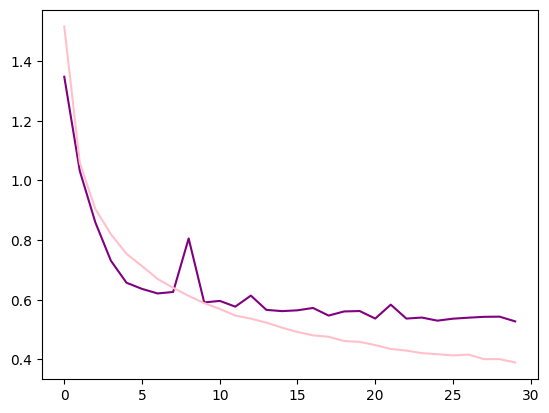

In [26]:
plt.plot(history.history['val_loss'],color='purple')
plt.plot(history.history['loss'],color='pink')
plt.show()

In [27]:
model.save('cnn-cifar10.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
model2=keras.models.load_model('cnn-cifar10.h5')

In [30]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [34]:
model2.predict(x_test[0:10])[0]

1/1 [==============================] - 1s 505ms/step


array([1.1158022e-03, 9.6692253e-05, 2.1652575e-04, 7.8193265e-01,
       7.0821421e-05, 2.0063247e-01, 2.3728271e-03, 1.2160895e-03,
       1.2256846e-02, 8.9219488e-05], dtype=float32)

In [35]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [37]:
labels[3]

'cat'

313/313 [==============================] - 1s 3ms/step


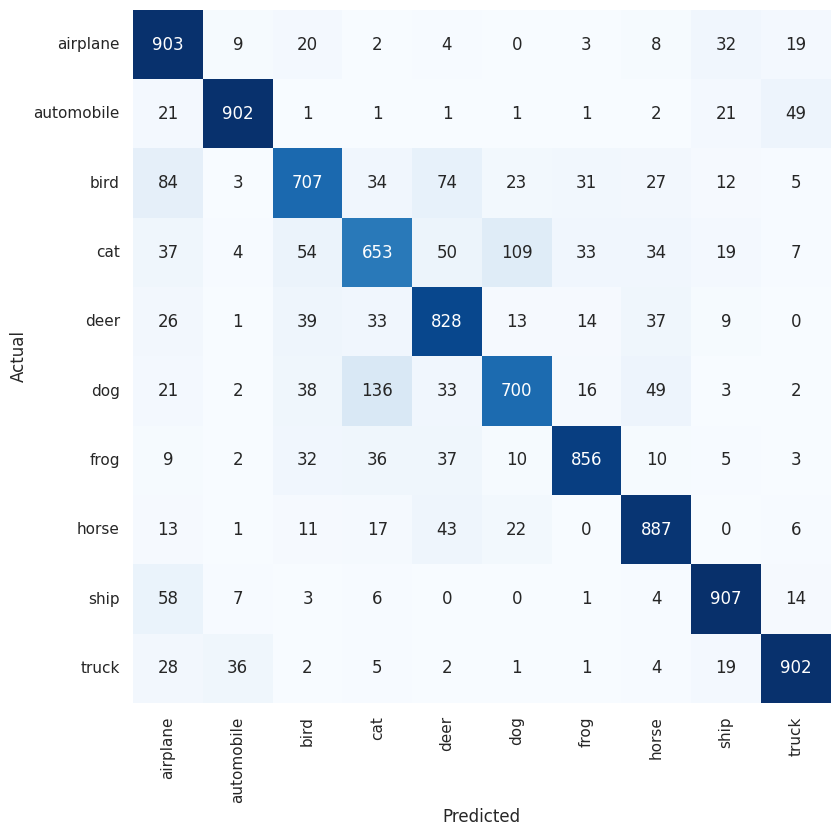

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis = 1)
y_test = np.argmax(y_test, axis = 1)
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

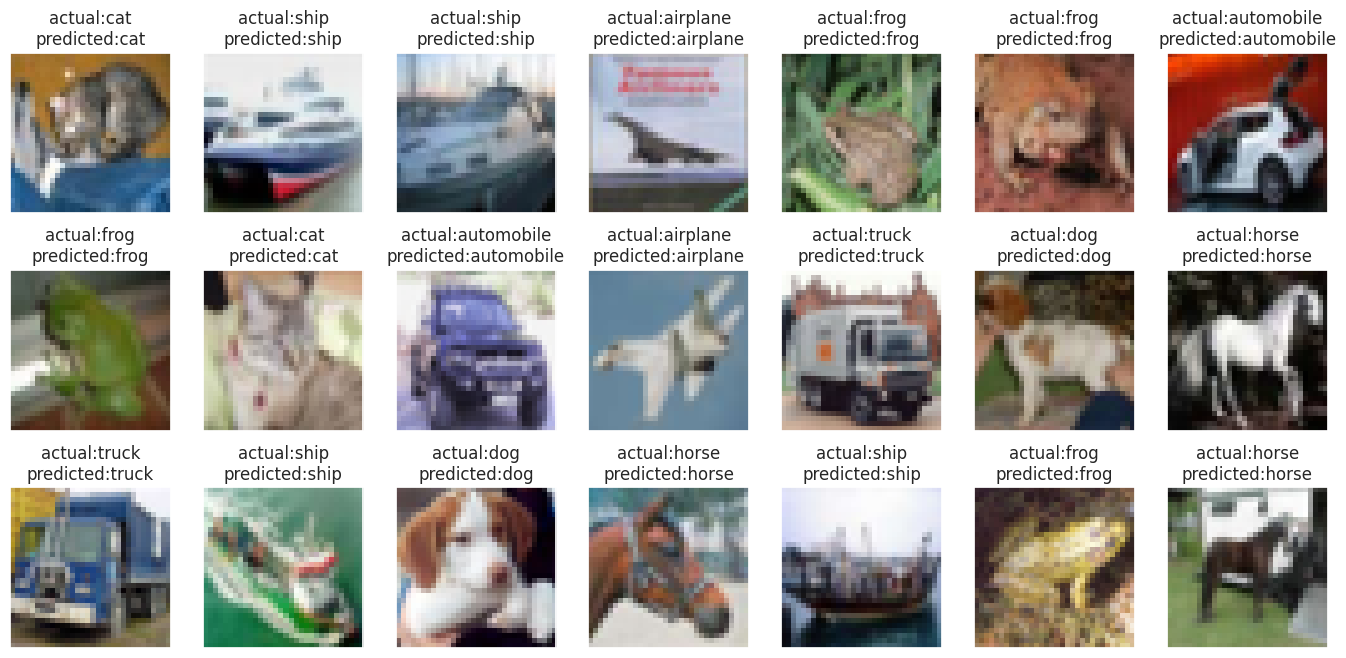

In [44]:

y_test = y_test.astype(int)
predictions = predictions.astype(int)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index]] + '\n' + 'predicted:' + labels[predictions[index]])
        axes[i,j].imshow(x_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()